# Descriptive Statistics Problems

## Exercise 1 – How long are movie titles?

In this exercise, you will apply descriptive statistics techniques to a real dataset: a database of 1000 popular movies from the IMDb website.

From the title of each movie, you will:
- Calculate the title length (in characters).
- Obtain key statistical metrics: mean, median, mode, range, variance, standard deviation, skewness, and kurtosis.
- Identify the longest and shortest titles.
- Visualize the distribution of these lengths with a histogram and a density curve.


In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics as stats
from scipy.stats import skew, kurtosis, mode

# Load IMDb dataset
url = "../assets/imdb_1000.csv"
df = pd.read_csv(url)
df

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
974,7.4,Tootsie,PG,Comedy,116,"[u'Dustin Hoffman', u'Jessica Lange', u'Teri G..."
975,7.4,Back to the Future Part III,PG,Adventure,118,"[u'Michael J. Fox', u'Christopher Lloyd', u'Ma..."
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."
977,7.4,Poltergeist,PG,Horror,114,"[u'JoBeth Williams', u""Heather O'Rourke"", u'Cr..."


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 46.0+ KB


In [4]:
# Create a new column called 'title_length' with the length (number of characters) of each title
df['title_length'] = df['title'].str.len()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 979 entries, 0 to 978
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   star_rating     979 non-null    float64
 1   title           979 non-null    object 
 2   content_rating  976 non-null    object 
 3   genre           979 non-null    object 
 4   duration        979 non-null    int64  
 5   actors_list     979 non-null    object 
 6   title_length    979 non-null    int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 53.7+ KB


In [13]:
# Calculate mean, median, and mode of the 'title_length' column

mean = df['title_length'].mean()

median = df['title_length'].median()

mode = df['title_length'].mode()

print(f'Mean: {mean:.2f}')
print(f'Median: {median}')
print(F'Mode: {mode}')

Mean: 15.48
Median: 14.0
Mode: 0    12
Name: title_length, dtype: int64


In [ ]:
# Calculate the range, variance, and standard deviation of 'title_length'

range_ = max(df['title_length']) - min(df['title_length'])
print(f"Range: {range_}")

variance = stats.variance(df['title_length'])
std = stats.stdev(df['title_length'])

print(f"Variance: {variance:.2f}")
print(f"Standard deviation: {std:.2f}")

Range: 67
Variance: 72.11
Standard deviation: 8.49


In [15]:
# Calculate skewness and kurtosis of the 'title_length' column

skewness = df['title_length'].skew()
kurtosis = df['title_length'].kurtosis()

print(f'Skewness: {skewness:.2f}')
print(f'Kurtosis: {kurtosis:.2f}')



Skewness: 1.53
Kurtosis: 3.81


In [16]:
# Print the shortest and longest title based on their length

# Find the shortest title
shortest_title = df.loc[df['title_length'].idxmin(), 'title']
shortest_length = df['title_length'].min() #added to get length
print(f"Shortest title: '{shortest_title}' (Length: {shortest_length})")

# Find the longest title
longest_title = df.loc[df['title_length'].idxmax(), 'title']
longest_length = df['title_length'].max() #added to get length
print(f"Longest title: '{longest_title}' (Length: {longest_length})")



Shortest title: 'M' (Length: 1)
Longest title: 'Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb' (Length: 68)


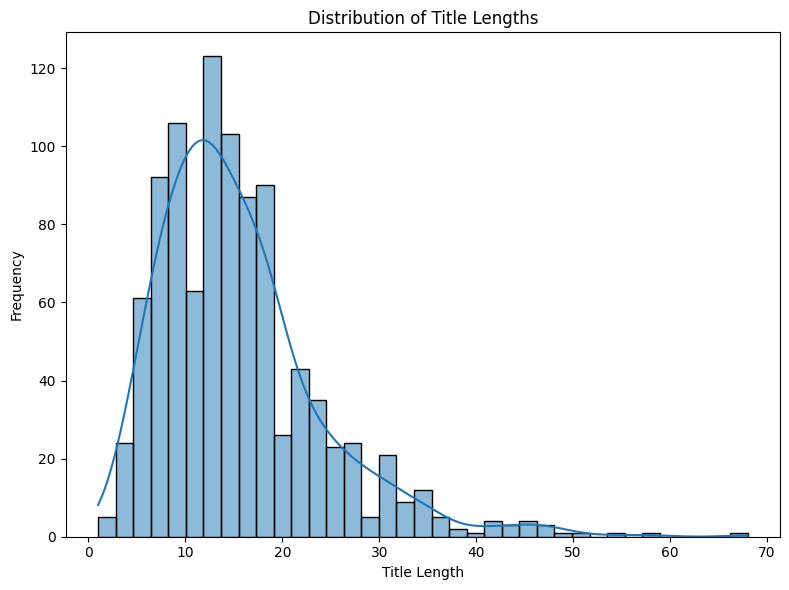

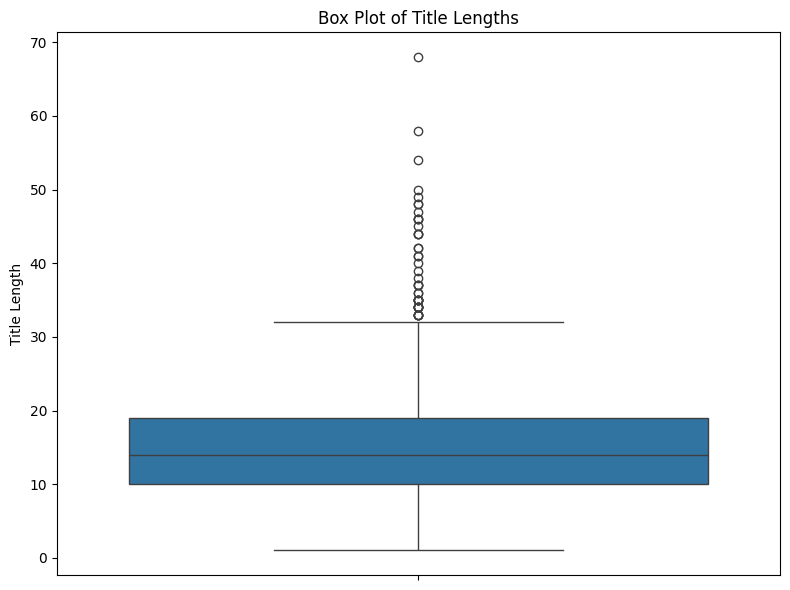

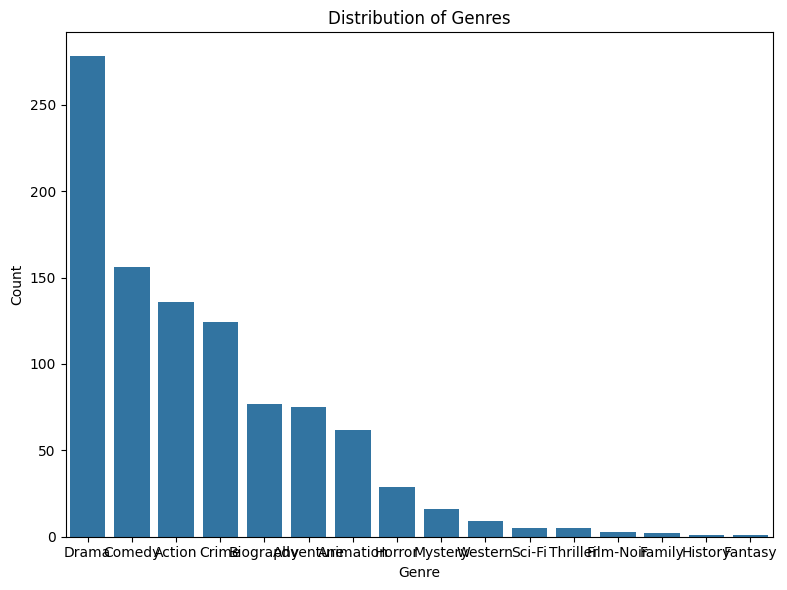

In [20]:
# plot your results
import seaborn as sns

# a. Histogram of 'title_length'
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sns.histplot(df['title_length'], kde=True)  # Use seaborn for histogram with KDE
plt.title('Distribution of Title Lengths')
plt.xlabel('Title Length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# b. Box plot of 'title_length'
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['title_length'])  # Seaborn boxplot
plt.title('Box Plot of Title Lengths')
plt.ylabel('Title Length')
plt.tight_layout()
plt.show()

# c. Bar plot of Genre distribution
plt.figure(figsize=(8, 6))
genre_counts = df['genre'].value_counts() #get counts
sns.barplot(x=genre_counts.index, y=genre_counts.values)
plt.title('Distribution of Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()


---

## Exercise 2 – Manual Calculation of Standard Deviation

In this exercise, you will manually calculate the standard deviation by selecting five actual titles from the movie dataset you loaded earlier.


In [22]:
# Create a list with 5 actual values from df['title_length'], for example: [10, 13, 14, 18, 22]
import random
list_title_length = df['title_length'].tolist() #creating the list

random.seed(2025)

list_title_length_sample = random.sample(list_title_length, 5)

print(f'{list_title_length_sample}')


[12, 19, 44, 13, 26]


In [25]:
# Calculate the mean of the 5 values
float(np.mean(list_title_length_sample))

22.8

In [33]:
# Calculate the squared differences with respect to the mean

# Standard deviation of list
float(np.std(list_title_length_sample))

11.720068259186888

In [ ]:
# Calculate the variance (average of the squared differences) and its square root to obtain the standard deviation

print(f'Lista: {list_title_length_sample}')

# calculation of "n"
n = len(list_title_length_sample)
print(f'n is equtal to: {n}')

mean_list = np.mean(list_title_length_sample)
print(f'Mean is equal to: {mean_list:.2f}') 

dif_squared = [(x - mean_list)**2 for x in list_title_length_sample]

variance = sum(dif_squared)/n

std_dev = np.sqrt(variance)

print(f'variance: {variance:.2f}')
print(f'Standard Deviation: {std_dev:.2f}')

Lista: [12, 19, 44, 13, 26]
n is equtal to:5
Mean is equal to: 22.80
variance: 137.36
Standard Deviation: 11.72


In [36]:
sum(list_title_length_sample)

114